In [1]:
import xarray as xr
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
from pprint import pprint
import os
from datetime import datetime
import calendar
import pandas as pd
from scipy import stats
import cartopy.crs as ccrs
import cartopy
from cartopy.util import add_cyclic_point
import matplotlib.colors as colors
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.dates as mdates
import textwrap
from matplotlib.ticker import FormatStrFormatter

/fs/site3/eccc/crd/ccrn/users/sah002/envs/sah002_env/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [8]:
fAOD = (xr.open_dataset('/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/rd_tracer_files/nudged_runs/aeroTracers_CanESM5-rd-bsln-ndgd-ens-000_amip_2013_2020.nc'))
print(fAOD)


<xarray.Dataset>
Dimensions:  (lat: 64, lev: 49, lon: 129, time: 96)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-16T12:00:00 2013-02-15 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lev      (lev) float64 -108.0 -144.0 -190.0 -250.0 -327.0 -426.0 -550.0 ...
Data variables:
    SSA      (time, lev, lat, lon) float32 ...
    SSC      (time, lev, lat, lon) float32 ...
    DUA      (time, lev, lat, lon) float32 ...
    DUC      (time, lev, lat, lon) float32 ...
    OCO      (time, lev, lat, lon) float32 ...
    OCY      (time, lev, lat, lon) float32 ...
    BCO      (time, lev, lat, lon) float32 ...
    BCY      (time, lev, lat, lon) float32 ...
    SO4      (time, lev, lat, lon) float32 ...
Attributes:
    CDI:           Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:   CF-1.6
    history:       Tue Feb 15 17:03:23 2022: cdo merge 

Text(0.5, 1.0, 'CMIP6 od550aer - Perturbed')

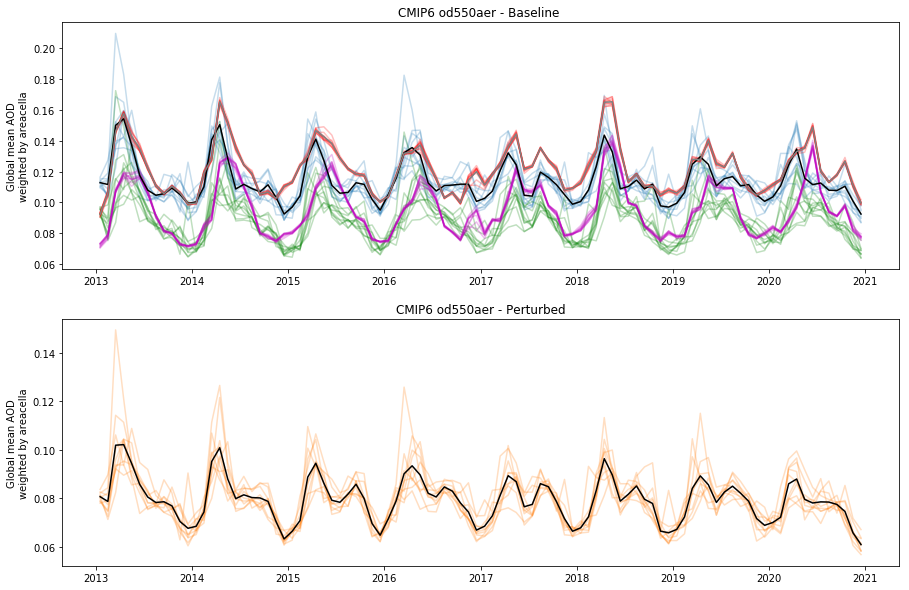

In [3]:

var   = 'od550aer'

table = 'AERmon'

runs_bl=['rd-bsln-ens-001-000',
         'rd-bsln-ens-001-001',
         'rd-bsln-ens-001-002',
         'rd-bsln-ens-001-003',
         'rd-bsln-ens-001-004',
         'rd-bsln-ens-001-005',
         'rd-bsln-ens-001-006',
         'rd-bsln-ens-001-007',
         'rd-bsln-ens-001-008',
         'rd-bsln-ens-001-009',]

runs_bln=['rd-bsln-ndgd-ens-000',
          'rd-bsln-ndgd-ens-001',
          'rd-bsln-ndgd-ens-002',
          'rd-bsln-ndgd-ens-003',
          'rd-bsln-ndgd-ens-004',
          'rd-bsln-ndgd-ens-005',
          'rd-bsln-ndgd-ens-006',
          'rd-bsln-ndgd-ens-007',
          'rd-bsln-ndgd-ens-008',
          'rd-bsln-ndgd-ens-009',]

runs_pt=['rd-prtb-ens-001-000',
         'rd-prtb-ens-001-001',
         'rd-prtb-ens-001-002',
         'rd-prtb-ens-001-003',
         'rd-prtb-ens-001-004',
         'rd-prtb-ens-001-005',
         'rd-prtb-ens-001-006',
         'rd-prtb-ens-001-007',
         'rd-prtb-ens-001-008',
         'rd-prtb-ens-001-009',]

runs_ptn=['rd-prtb-ndgd-ens-000',
         'rd-prtb-ndgd-ens-001',
         'rd-prtb-ndgd-ens-002',
         'rd-prtb-ndgd-ens-003',
         'rd-prtb-ndgd-ens-004',
         'rd-prtb-ndgd-ens-005',
         'rd-prtb-ndgd-ens-006',
         'rd-prtb-ndgd-ens-007',
         'rd-prtb-ndgd-ens-008',
         'rd-prtb-ndgd-ens-009',]

to_plot_bl = []
to_plot_bln = []
to_plot_fAOD_bl = []
to_plot_fAOD_bln = []

i=0
for runid in runs_bl:
    areacella = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid+"/amip/r1i1p1f1/fx/areacella/gn/v20190429/*.nc")   
    weights   = (areacella['areacella']/areacella['areacella'].max().values).values
    run_ds    = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid+"/amip/r1i1p1f1/"+table+"/"+var+"/gn/v20190429/*.nc")[var]  
    run_dsw   = (run_ds).mean(('lat','lon'))
    run_dsw   = run_dsw.rename(var+str(i))
    to_plot_bl.append(run_dsw)


    fAOD = xr.open_dataset('/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/rd_filteredAOD_files/filteredAOD_CanESM5-'+runid+'_amip_2013_2020.nc')
    fAODm = ((fAOD['ODSM']/fAOD['ODMK'])).mean('lat').mean('lon')
    to_plot_fAOD_bl.append(fAODm)
    
    i+=1
ds_bl = xr.merge(to_plot_bl) 
mean = ds_bl.to_array(dim='new').mean('new')
ds_bl['mean'] = mean


i=0
for runid in runs_bln:
    areacella = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid+"/amip/r1i1p1f1/fx/areacella/gn/v20190429/*.nc")   
    weights   = (areacella['areacella']/areacella['areacella'].max().values).values
    run_ds    = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid+"/amip/r1i1p1f1/"+table+"/"+var+"/gn/v20190429/*.nc")[var]  
    run_dsw   = (run_ds).mean(('lat','lon'))
    run_dsw   = run_dsw.rename(var+str(i))
    to_plot_bln.append(run_dsw)


    fAOD = xr.open_dataset('/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/rd_filteredAOD_files/nudged_runs/filteredAOD_CanESM5-'+runid+'_amip_2013_2020.nc')
    fAODm = ((fAOD['ODSM']/fAOD['ODMK'])).mean('lat').mean('lon')
    to_plot_fAOD_bln.append(fAODm)
    
    i+=1
ds_bln = xr.merge(to_plot_bln) 
mean = ds_bln.to_array(dim='new').mean('new')
ds_bln['mean'] = mean

    
to_plot_pt = []
i=0
for runid in runs_pt:
    areacella = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid+"/amip/r1i1p1f1/fx/areacella/gn/v20190429/*.nc")   
    weights   = (areacella['areacella']/areacella['areacella'].max().values).values
    run_ds    = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid+"/amip/r1i1p1f1/"+table+"/"+var+"/gn/v20190429/*.nc")[var]  
    run_dsw   = (run_ds*weights).mean(('lat','lon'))
    run_dsw   = run_dsw.rename(var+str(i))
    to_plot_pt.append(run_dsw)
    i+=1
ds_pt = xr.merge(to_plot_pt) 
mean = ds_pt.to_array(dim='new').mean('new')
ds_pt['mean'] = mean





fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,1,1)
for run in to_plot_bl:
    ax1.plot(run.time, run, alpha=0.25,color='C0')
for run in to_plot_fAOD_bl:
    ax1.plot(run.time, run, alpha=0.25,color='g')
for run in to_plot_bln:
    ax1.plot(run.time, run, alpha=0.25,color='r')
for run in to_plot_fAOD_bln:
    ax1.plot(run.time, run, alpha=0.25,color='m')    

ax1.plot(ds_bl.time, ds_bl['mean'], alpha=1,label='Baseline ensemble mean and 95% CI',color='k')
ax1.plot(ds_bln.time, ds_bln['mean'], alpha=1,label='Baseline ensemble mean and 95% CI',color='grey')

ax1.set_ylabel('Global mean AOD\nweighted by areacella')
ax1.set_title('CMIP6 '+var+' - Baseline ')
#ax1.legend()

ax1 = plt.subplot(2,1,2)
for run in to_plot_pt:
    ax1.plot(run.time, run, alpha=0.25,color='C1')
ax1.plot(ds_pt.time, ds_pt['mean'],alpha=1,label='Perturbed ensemble mean and 95% CI',color='k')
ax1.set_ylabel('Global mean AOD\nweighted by areacella')
ax1.set_title('CMIP6 '+var+' - Perturbed')
#ax1.legend()

    
    


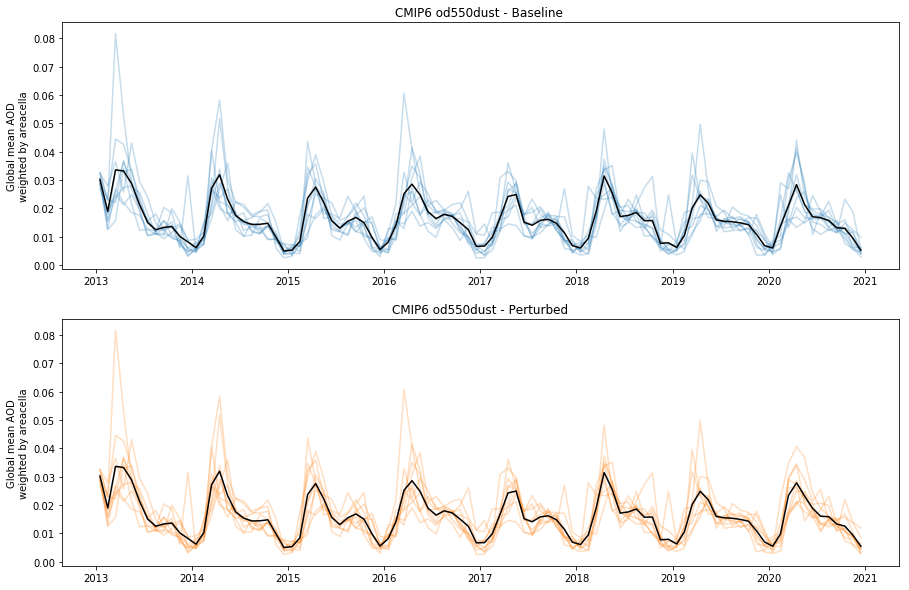

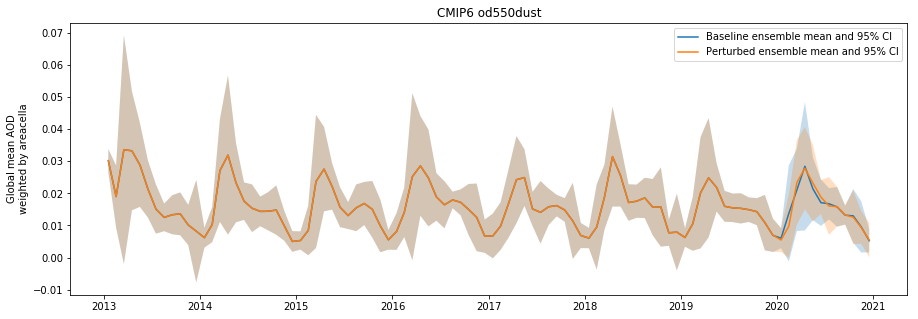

In [2]:

var   = 'od550dust'

table = 'AERmon'

runs_bl=['rd-bsln-ens-001-000',
         'rd-bsln-ens-001-001',
         'rd-bsln-ens-001-002',
         'rd-bsln-ens-001-003',
         'rd-bsln-ens-001-004',
         'rd-bsln-ens-001-005',
         'rd-bsln-ens-001-006',
         'rd-bsln-ens-001-007',
         'rd-bsln-ens-001-008',
         'rd-bsln-ens-001-009',]

runs_pt=['rd-prtb-ens-001-000',
         'rd-prtb-ens-001-001',
         'rd-prtb-ens-001-002',
         'rd-prtb-ens-001-003',
         'rd-prtb-ens-001-004',
         'rd-prtb-ens-001-005',
         'rd-prtb-ens-001-006',
         'rd-prtb-ens-001-007',
         'rd-prtb-ens-001-008',
         'rd-prtb-ens-001-009',]

to_plot_bl = []
i=0
for runid in runs_bl:
    areacella = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid+"/amip/r1i1p1f1/fx/areacella/gn/v20190429/*.nc")   
    weights   = (areacella['areacella']/areacella['areacella'].max().values).values
    run_ds    = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid+"/amip/r1i1p1f1/"+table+"/"+var+"/gn/v20190429/*.nc")[var]  
    run_dsw   = (run_ds*weights).mean(('lat','lon'))
    run_dsw   = run_dsw.rename(var+str(i))
    to_plot_bl.append(run_dsw)
    i+=1
ds_bl = xr.merge(to_plot_bl) 
mean = ds_bl.to_array(dim='new').mean('new')
std  = ds_bl.to_array(dim='new').std('new')
ds_bl['mean'] = mean
ds_bl['std']  = std

    
to_plot_pt = []
i=0
for runid in runs_pt:
    areacella = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid+"/amip/r1i1p1f1/fx/areacella/gn/v20190429/*.nc")   
    weights   = (areacella['areacella']/areacella['areacella'].max().values).values
    run_ds    = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid+"/amip/r1i1p1f1/"+table+"/"+var+"/gn/v20190429/*.nc")[var]  
    run_dsw   = (run_ds*weights).mean(('lat','lon'))
    run_dsw   = run_dsw.rename(var+str(i))
    to_plot_pt.append(run_dsw)
    i+=1
ds_pt = xr.merge(to_plot_pt) 
mean = ds_pt.to_array(dim='new').mean('new')
std  = ds_pt.to_array(dim='new').std('new')
ds_pt['mean'] = mean
ds_pt['std']  = std





fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,1,1)
for run in to_plot_bl:
    ax1.plot(run.time, run, alpha=0.25,color='C0')
ax1.plot(ds_bl.time, ds_bl['mean'], alpha=1,label='Baseline ensemble mean and 95% CI',color='k')
#ax1.fill_between(ds_bl['time'].values, (ds_bl['mean']-2*ds_bl['std']), ds_bl['mean']+2*ds_bl['std'],alpha=0.25)
ax1.set_ylabel('Global mean AOD\nweighted by areacella')
ax1.set_title('CMIP6 '+var+' - Baseline ')
#ax1.legend()

ax1 = plt.subplot(2,1,2)
for run in to_plot_pt:
    ax1.plot(run.time, run, alpha=0.25,color='C1')
ax1.plot(ds_pt.time, ds_pt['mean'],alpha=1,label='Perturbed ensemble mean and 95% CI',color='k')
#ax1.fill_between(ds_pt['time'].values, (ds_pt['mean']-2*ds_pt['std']), ds_pt['mean']+2*ds_pt['std'],alpha=0.25)
ax1.set_ylabel('Global mean AOD\nweighted by areacella')
ax1.set_title('CMIP6 '+var+' - Perturbed')
#ax1.legend()

    
    

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,1,1)
ax1.plot(ds_bl.time, ds_bl['mean'], label='Baseline ensemble mean and 95% CI')
ax1.fill_between(ds_bl['time'].values, (ds_bl['mean']-2*ds_bl['std']), ds_bl['mean']+2*ds_bl['std'],alpha=0.25)
ax1.set_ylabel('Global mean AOD\nweighted by areacella')
ax1.set_title('CMIP6 '+var)

ax1.plot(ds_pt.time, ds_pt['mean'], label='Perturbed ensemble mean and 95% CI')
ax1.fill_between(ds_pt['time'].values, (ds_pt['mean']-2*ds_pt['std']), ds_pt['mean']+2*ds_pt['std'],alpha=0.25)
ax1.set_ylabel('Global mean AOD\nweighted by areacella')
ax1.legend()



In [ ]:
#var_list = ['clt','concccn02','concccn04','concccn08','concccn16','concccn20','iwp','lwp','pr','prw','cdnc','cldupdrft'] #all cloud vars
#var_list = ['clt','iwp','lwp','pr','prw']  #vertically integrated vars
#var_list = ['abs550aer','bldep','dryso2','emibc','emidms','emiso2','emiso4','lwp','od550aer','od550csaer','od550dust','od550ss','wetso2'] #'co2''dms','so2','ps',
var_list = ['od550aer']
#var_list = ['odmk']

table = "AERmon"

runid1 = 'rd-bsln-ens-001-000'#"rd-bsln-001" 
runid2 = 'rd-bsln-ens-001-001'#"rd-prtb-001" 
runid3 = 'rd-bsln-ens-001-002'#"rd-bsln-test" 
runid4 = 'rd-bsln-ens-001-003'#"rd-prtb-test" 

for var in var_list:
    
    areacella = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid1+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid1+"/amip/r1i1p1f1/fx/areacella/gn/v20190429/*.nc")   
    weights = (areacella['areacella']/areacella['areacella'].max().values).values
    
    mask_bl   = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/rd-bsln-001/data/nccrip_files/*odmk*.nc")['ODMK']
    aod_bl    = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/rd-bsln-001/data/nccrip_files/*odsm*.nc")['ODSM']
    mask_pt   = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/rd-prtb-001/data/nccrip_files/*odmk*.nc")['ODMK']
    aod_pt    = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/rd-prtb-001/data/nccrip_files/*odsm*.nc")['ODSM']
    aod_blm   = aod_bl.isel(lon=slice(0, -1))*mask_bl.isel(lon=slice(0, -1))
    aod_ptm   = aod_pt.isel(lon=slice(0, -1))*mask_pt.isel(lon=slice(0, -1))
    aod_blw   = (aod_blm*weights).mean(('lat','lon'))
    aod_ptw   = (aod_ptm*weights).mean(('lat','lon'))
    
    tmask_bl   = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/rd-bsln-test/data/nccrip_files/*odmk*.nc")['ODMK']
    taod_bl    = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/rd-bsln-test/data/nccrip_files/*odsm*.nc")['ODSM']
    taod_blm   = taod_bl.isel(lon=slice(0, -1))*tmask_bl.isel(lon=slice(0, -1))
    taod_blw   = (taod_blm*weights).mean(('lat','lon'))
        
    bsln      = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid1+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid1+"/amip/r1i1p1f1/"+table+"/"+var+"/gn/v20190429/*.nc")[var]
    prtb      = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid2+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid2+"/amip/r1i1p1f1/"+table+"/"+var+"/gn/v20190429/*.nc")[var]
    bsln_t    = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid3+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid3+"/amip/r1i1p1f1/"+table+"/"+var+"/gn/v20190429/*.nc")[var]
    prtb_t    = xr.open_mfdataset("/space/hall3/sitestore/eccc/crd/ccrn/users/sah002/"+runid4+"/data/nc_output/CMIP6/CCCma/CCCma/CanESM5-"+runid4+"/amip/r1i1p1f1/"+table+"/"+var+"/gn/v20190429/*.nc")[var]
      
    bsln_w  = (bsln*weights).mean(('lat','lon'))
    prtb_w  = (prtb*weights).mean(('lat','lon'))
    bsln_tw = (bsln_t*weights).mean(('lat','lon'))
    prtb_tw = (prtb_t*weights).mean(('lat','lon'))
        

    fig = plt.figure(figsize=(20,5))
    ax1 = plt.subplot(1,2,1)
    ax1.plot(bsln_w.time, bsln_w, label='baseline with new boundary conditions')
    ax1.plot(prtb_w.time, prtb_w, label='perturbed with new boundary conditions')
    ax1.set_ylabel('Global mean AOD\nweighted by areacella')
    ax1.set_title('CMIP6 AOD')
    ax1.legend()
    
    ax1 = plt.subplot(1,2,2)
    ax1.plot(aod_blw.time, aod_blw, label='baseline with new boundary conditions')
    ax1.plot(aod_ptw.time, aod_ptw, label='perturbed with new boundary conditions')
    ax1.set_ylabel('Global mean AOD - weighted by areacella')
    ax1.set_title('Global mean AOD\nfiltered by sunlight and cloud cover and weighted by areacella')
    ax1.legend()
    
    
    
    
    fig = plt.figure(figsize=(20,5))
    ax1 = plt.subplot(1,2,1)
    ax1.plot(bsln_w.time, bsln_w,label='baseline with new boundary conditions')
    ax1.plot(bsln_tw.time, bsln_tw,label='baseline with old boundary conditions', color='k')
    ax1.set_ylabel('Global mean AOD\nweighted by areacella')
    ax1.legend()
    
    ax1 = plt.subplot(1,2,2)
    ax1.plot(aod_blw.time, aod_blw, label='baseline with new boundary conditions')
    ax1.plot(taod_blw.time, taod_blw, label='baseline with old boundary conditions', color='k')
    ax1.set_ylabel('Global mean AOD\nfiltered by sunlight and cloud cover and weighted by areacella')
    ax1.legend()
    
    
